# Exploratory Data Analysis in Python

## Introduction

This was completed as a part of the Google Advanced Data Analytics Certificate

In this activity, I was provided with a dataset from an imaginary company. My goal is to help management decide which companies to invest in next. The the firm wants insights into unicorn companies. The data provided has information on over 1,000 unicorn companies, including  industry, country, year founded, and select investors. 

## Step 1: Importing libraries and data

#### Import libraries and packages 

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the dataset into a DataFrame
The dataset provided is in the form of a csv file named `Unicorn_Companies.csv`

In [3]:
companies = pd.read_csv("Unicorn_Companies.csv")

## Step 2: Data exploration

#### Display the first 10 rows of the data


In [4]:
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


#### Assess the size of the dataset

In [5]:
companies.size

10740

#### Determine the shape of the dataset

In [6]:
companies.shape

(1074, 10)

We can see that there is only about 1k entries, each with about 10 descriptive stats

#### Get basic information about the dataset

In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


#### Check for duplicates in the data

In [8]:
companies.drop_duplicates().shape

(1074, 10)

#### Check the data types of each column

In [9]:
companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

#### Sort data

In [10]:
companies.sort_values(by="Year Founded", ascending=False).head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,1/31/22,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,10/17/17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,12/28/21,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,10/28/21,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,3/30/22,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
314,Flink Food,$3B,12/1/21,E-commerce & direct-to-consumer,Berlin,Germany,Europe,2021,$1B,"Mubadala Capital, Bond, Prosus Ventures"
864,Aptos,$1B,3/15/22,Internet software & services,Palo Alto,United States,North America,2021,$200M,"Andreessen Horowitz, Coinbase Ventures, Tiger ..."
238,Yuga Labs,$4B,3/22/22,Fintech,Miami,United States,North America,2021,$450M,"Andreessen Horowitz, Thrive Capital, Sound Ven..."
775,Jokr,$1B,12/2/21,E-commerce & direct-to-consumer,New York,United States,North America,2021,$430M,"GGV Capital, Tiger Global Management, Greycroft"
967,Mensa Brands,$1B,11/16/21,Other,Bengaluru,India,Asia,2021,$218M,"Accel, Falcon Edge Capital, Norwest Venture Pa..."


#### Determine the number of companies founded each year
This will tell us if a significant portion of data is from before the 2000's, which may affect outcomes.

In [11]:
companies["Year Founded"].value_counts().sort_values(ascending=False)

2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1992      1
1993      1
1990      1
1984      1
1996      1
1979      1
1991      1
1919      1
1997      1
Name: Year Founded, dtype: int64

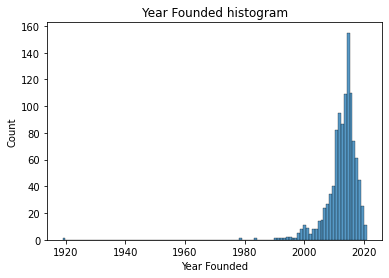

In [12]:
# plot a histogram
sns.histplot(data=companies, x='Year Founded')
plt.title('Year Founded histogram');

## Step 3: Statistical tests

#### Find descriptive statistics

In [15]:
companies.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


We can see that the timeframe for our data set is from 1919 to 2021.

#### Convert the `Date Joined` column to datetime

For easier manipulation later on

In [16]:
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])

In [17]:
companies.info() # verification of previous step

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


#### Create a `Year Joined` column

In [18]:
companies['Year Joined'] = companies["Date Joined"].dt.year

In [19]:
companies.head(10) # verification of previous step

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
5,Canva,$40B,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat...",2018
6,Checkout.com,$40B,2019-05-02,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST...",2019
7,Instacart,$39B,2014-12-30,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By...",2014
8,JUUL Labs,$38B,2017-12-20,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management,2017
9,Databricks,$38B,2019-02-05,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates...",2019


#### Create a `Month Joined` column

In [26]:
companies["Month Joined"] = companies["Date Joined"].dt.month_name()
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December


#### Create a `Years To Join` column

In [27]:
companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Year Founded"]
companies.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017,April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018,July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014,January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011,December,6


## Step 4: Evaluation


#### Take a sample of the data
Optional step

In [28]:
companies_sample = companies.sample(n=100, random_state=99)

#### Visualize the time it took companies to reach unicorn status

In [29]:
# Prepare data for plotting (can use full set or the sample. I will use the sample as this is just an example

    # years until 'Unicorn' status of each company
companies_sample["Years to 'Unicorn' Status"] = companies_sample['Year Joined'] - companies_sample['Year Founded']

    # group each industry together
grouped = (companies_sample[["Industry", "Years to 'Unicorn' Status"]]
           .groupby("Industry")
           .max()
           .sort_values(by="Years to 'Unicorn' Status")
          )
grouped

,Years to 'Unicorn' Status
Industry,
Artificial Intelligence,4
Mobile & telecommunications,5
"Supply chain, logistics, & delivery",6
Travel,9
Artificial intelligence,10
Auto & transportation,11
Hardware,11
Data management & analytics,12
E-commerce & direct-to-consumer,12


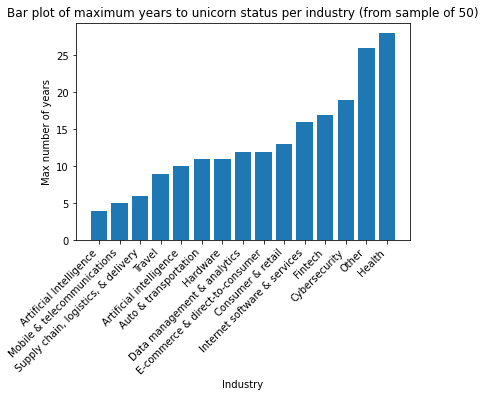

In [30]:
# Create bar plot
plt.bar(grouped.index, grouped["Years to 'Unicorn' Status"])

# Set title
plt.title("Bar plot of maximum years to unicorn status per industry (from sample of 50)")

# Set x-axis label
plt.xlabel("Industry")

# Set y-axis label
plt.ylabel("Max number of years")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot
plt.show()

We can see that in this sampling, time to unicorn status is lowest for AI, Mobile/Telecommunications, supply chain/logistics/delivery fields. This suggests that these companies should be focused on during investment.

Additionally, as health and cybersecurity takes a longer time to reach unicorn status, they need to be approached carefully for investment opportunities.

However, this includes data dating from before the .com boom, so more recent data should be separately analyzed.

#### Gain more insight on a specific year

In [31]:
companies_2021 = companies[companies["Date Joined"].dt.year == 2021]
companies_2021.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Month Joined,Years To Join
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank",2021,July,3
16,J&T Express,$20B,2021-04-07,"Supply chain, logistics, & delivery",Jakarta,Indonesia,Asia,2015,$5B,"Hillhouse Capital Management, Boyu Capital, Se...",2021,April,6
24,Blockchain.com,$14B,2021-02-17,Fintech,London,United Kingdom,Europe,2011,$490M,"Lightspeed Venture Partners, Google Ventures, ...",2021,February,10
27,OpenSea,$13B,2021-07-20,E-commerce & direct-to-consumer,New York,United States,North America,2017,$427M,"Andreessen Horowitz, Thirty Five Ventures, Sou...",2021,July,4
34,Getir,$12B,2021-03-26,E-commerce & direct-to-consumer,Istanbul,Turkey,Europe,2015,$2B,"Tiger Global Management, Sequoia Capital, Revo...",2021,March,6


#### Observe trends over time

In [32]:
companies_2021.insert(3, "Week Joined", companies_2021["Date Joined"].dt.strftime('%Y-W%V'), True)
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})

companies_by_week_2021.head()

,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


#### Compare trends over time

In [33]:
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')
companies_2020_2021["Valuation"] =  companies_2020_2021["Valuation"].str.strip("$B").astype(float)

companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})

companies_by_quarter_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


## Step 5: Visualization

#### Visualize the maximum unicorn company valuation per industry

In [42]:
# Create a column representing company valuation as numeric data
companies_sample['valuation_billions'] = companies_sample['Valuation']

# Remove unnecessary characters from each value
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('$', '')
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].str.replace('B', '')

# Convert to type int
companies_sample['valuation_billions'] = companies_sample['valuation_billions'].astype('int')
companies_sample.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined,Years to 'Unicorn' Status,valuation_billions
698,Firebolt,$1B,2022-01-26,Data management & analytics,Tel Aviv,Israel,Asia,2019,$264M,"TLV Partners, Zeev Ventures, Bessemer Venture ...",2022,3,1
595,Trendy Group International,$2B,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,$200M,L Capital Partners,2012,13,2
462,Hibob,$2B,2021-10-12,Internet software & services,Tel Aviv,Israel,Asia,2015,$274M,"Bessemer Venture Partners, Eight Roads Venture...",2021,6,2
474,Dragos,$2B,2021-10-28,Cybersecurity,Hanover,United States,North America,2016,$358M,"DataTribe, Energy Impact Partners, AllegisCybe...",2021,5,2
610,DeepBlue Technology,$1B,2018-04-16,Artificial intelligence,Shanghai,China,Asia,2014,$79M,"DESUN Capital, Yunfeng Capital, Meridian Capital",2018,4,1


In [43]:
# Prepare data for modeling
grouped = (companies_sample[["Industry", "valuation_billions"]]
           .groupby("Industry")
           .max()
           .sort_values(by="valuation_billions")
          )
grouped

,valuation_billions
Industry,
Artificial Intelligence,1
Mobile & telecommunications,1
Auto & transportation,3
Cybersecurity,3
Data management & analytics,3
Health,4
E-commerce & direct-to-consumer,5
Hardware,5
Other,5


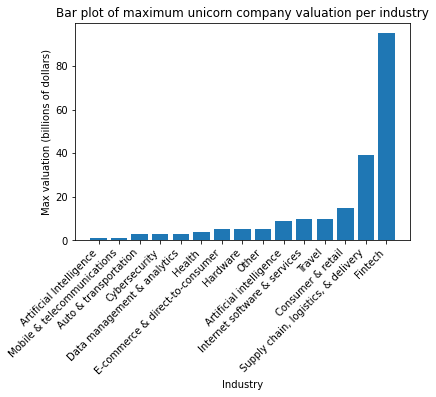

In [44]:
# Create bar plot
plt.bar(grouped.index, grouped["valuation_billions"])

# Set title
plt.title("Bar plot of maximum unicorn company valuation per industry")

# Set x-axis label
plt.xlabel("Industry")

# Set y-axis label
plt.ylabel("Max valuation (billions of dollars)")

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text  
plt.xticks(rotation=45, horizontalalignment='right')

# Display plot
plt.show()

AI tends to have the lowest evaluation, so while they take less time to reach unicorn status, the return is much lower. 

On the other end of the spectrum, supply chain/logistics/delivery is 2nd highest in max evaluation, AND has low max time to unicorn status. This suggests that the supply chain/logistics/delivery industry is the best choice for investment.


#### Visualize the time it took companies to reach unicorn status

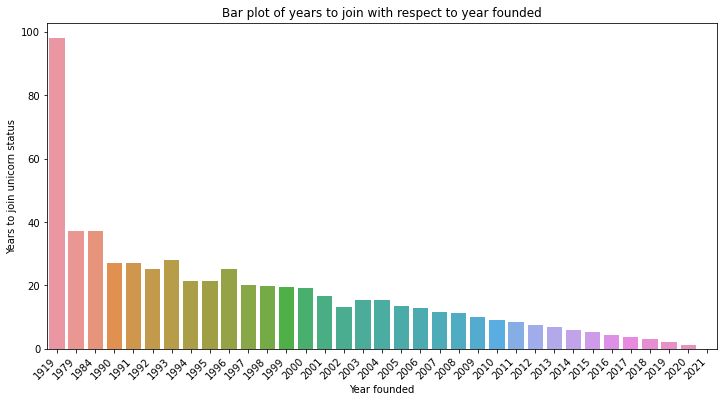

In [34]:
plt.figure(figsize=(12,6))

sns.barplot(x=companies["Year Founded"], y=companies["Years To Join"], ci=False)

# Set title
plt.title("Bar plot of years to join with respect to year founded")


# Set x-axis label
plt.xlabel("Year founded")


# Set y-axis label
plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  
plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.
plt.show()

**References**

Bhat, M.A. (2022, March). [*Unicorn Companies*](https://www.kaggle.com/datasets/mysarahmadbhat/unicorn-companies). 

